In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_data = pd.read_csv('data/Train_BigMart.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
test_data = pd.read_csv('data/Test_BigMart.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
# save the target attribute
label = train_data['Item_Outlet_Sales']
# combining both data sets
train_data.drop('Item_Outlet_Sales', axis=1, inplace=True)

In [8]:
combined = train_data.append(test_data)

In [9]:
combined.reset_index(inplace=True)

In [10]:
combined.drop('index',axis=1,inplace=True)

In [11]:
# whole combined data set 
combined

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [12]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


In [13]:
# changning the type of attributes
combined.Item_Fat_Content.value_counts()
combined.Item_Fat_Content = combined.Item_Fat_Content.astype('category')
combined.Item_Type = combined.Item_Type.astype('category')
combined.Outlet_Identifier = combined.Outlet_Identifier.astype('category')
combined.Outlet_Size = combined.Outlet_Size.astype('category')
combined.Outlet_Location_Type = combined.Outlet_Location_Type.astype('category')
combined.Outlet_Type = combined.Outlet_Type.astype('category')
combined.Item_Identifier = combined.Item_Identifier.astype('category')

In [14]:
# now separate the qualitative and quantitative data
numeric_data = combined.select_dtypes(exclude=['category'])
cat_data = combined.select_dtypes(include=['category'])

In [15]:
# first deal with numeric data
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 4 columns):
Item_Weight                  11765 non-null float64
Item_Visibility              14204 non-null float64
Item_MRP                     14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
dtypes: float64(3), int64(1)
memory usage: 444.0 KB


In [16]:
# cleaning and scaling the numeric values
# handle missing values
# applying feature scaling to numeric data
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#scpy.stat skew function, on dependent variable
# p.log1p() # dependent variable
# box coks1p  # independent

In [17]:
num_pip = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
numeric_clean_data = num_pip.fit(numeric_data).transform(numeric_data)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
numeric_clean_data = pd.DataFrame(numeric_clean_data,columns=numeric_data.columns)
numeric_clean_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.816997,-0.969852,1.752511,0.139681
1,-1.615164,-0.907063,-1.493696,1.334228
2,1.119385,-0.956000,0.009874,0.139681
3,1.520830,-1.281712,0.661838,0.020226
4,-0.904370,-1.281712,-1.403623,-1.293777
5,-0.558419,-1.281712,-1.443256,1.334228
6,0.210230,-1.034104,-1.342458,-1.293777
7,-0.037721,1.195510,-0.535442,-1.532686
8,0.812398,-0.957418,-0.709230,0.498045
9,1.520830,0.553801,0.754073,1.095319


In [19]:
# cleaning and handling categorical data
cat_data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [20]:
cat_data.Item_Fat_Content = cat_data.Item_Fat_Content.replace('LF','Low Fat')
cat_data.Item_Fat_Content = cat_data.Item_Fat_Content.replace('reg','Regular')
cat_data.Item_Fat_Content = cat_data.Item_Fat_Content.replace('low fat','Low Fat')

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
cat_data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
reg           0
low fat       0
LF            0
Name: Item_Fat_Content, dtype: int64

In [22]:
#outlet size
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [23]:
cat_data=cat_data.fillna(
    {'Outlet_Size':st.mode(cat_data.Outlet_Size)}
)
cat_data.Outlet_Size.isnull().sum()

0

In [24]:
cat_data.isnull().sum() # categorical columns have been cleaned

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [25]:
# now one hot encoding of categorical variables
cat_coding_data = pd.get_dummies(cat_data,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size'
                                                  ,'Outlet_Location_Type','Outlet_Type'])

In [26]:
cat_coding_data

,Item_Identifier,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,FDP36,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,FDO10,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,FDP10,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,FDH17,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,FDU28,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [27]:
# now combine the both numerical and categorical data
process_data = pd.concat([numeric_clean_data,cat_coding_data,label],axis=1)

In [96]:
train_data = process_data[:8523]
test_data = process_data[8523:]
# first remove outliers an than normalize

In [97]:
train_data
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
8523,1.886853,-1.134699,-0.533831,0.139681,FDW58,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,NaN
8524,-1.053141,-0.534917,-0.864708,1.095319,FDW14,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,NaN
8525,0.434567,0.653405,1.622763,0.020226,NCN55,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,NaN
8526,-1.285743,-0.982657,0.225966,1.095319,FDQ58,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,NaN
8527,-0.037721,1.023121,1.501577,-1.532686,FDY38,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,NaN
8528,-0.698925,-0.041502,-0.384245,-0.099229,FDH56,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,NaN
8529,1.556252,0.323548,-1.464153,1.334228,FDL48,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,NaN
8530,-0.037721,-0.974998,-0.965547,-1.532686,FDC48,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,NaN
8531,-1.524249,1.115745,-0.729026,0.498045,FDN33,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,NaN
8532,-1.599815,-1.170970,0.739109,1.095319,FDA36,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,NaN


(8523, 47)

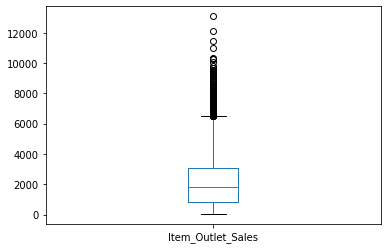

In [98]:
# # now both numerical and categorical data have been cleaned
# # its time to check outliers in the target(dependent) variable
# remove outlier in train data
train_data.Item_Outlet_Sales.plot.box()
train_data.shape

In [100]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 4.5 * s < e < u + 4.5 * s)]
    return filtered

# Item_Outlet_Size is my dependent variable
label_data1 = reject_outliers(train_data.Item_Outlet_Sales)

In [101]:
label_data2 = np.array(label_data1)

In [102]:
label_data4 = pd.DataFrame(label_data2)

In [105]:
# label_data4

(8510, 1)

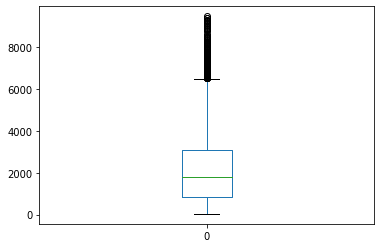

In [103]:
# outliers have been removed from data dependent variable
label_data4.plot.box()
label_data4.shape

In [106]:
# # now we get the data by removing outliers

arr_2d = label_data4.values
arr_1d = arr_2d.ravel()
arr_lst = list(arr_1d)
train_data_cleaned = process_data.loc[process_data.Item_Outlet_Sales.isin(arr_lst)]
train_data_cleaned.shape

(8510, 47)

In [107]:
train_data_cleaned.reset_index(inplace=True)

In [108]:
train_data_cleaned.drop('index', axis=1, inplace=True)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
train_label = train_data_cleaned.Item_Outlet_Sales
train_features = train_data_cleaned.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)

In [116]:
train_data_cleaned.to_csv("train_big_mart_data.csv")

In [119]:
test_data.drop('Item_Outlet_Sales',axis = 1, inplace=True)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [122]:
test_data.reset_index(inplace=True)

In [126]:
test_data.drop('index',inplace=True,axis=1)

In [128]:
test_data.drop('level_0',inplace=True,axis=1)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [130]:
test_data.to_csv('test_big_mart_data.csv')